#                         Employee Retention 
                                            Using classification algorithm(Logistic Regression)                                                 

Import dependencies

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline

Reading the CSV( comma separated values) from the folder 

In [2]:
data = pd.read_csv("C:/Users/Anju/HR_data1.csv")

Reading the first five rows of the Dataset

In [3]:
data.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Number of Rows and columns

In [83]:
data.shape

(14999, 10)

Check whether is any null value in the Dataset

In [84]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
data.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

Checking the correction of the features in the dataset

In [4]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


To see the column names of the dataset 

###  Exploratory Data

Explore all the features of the dataset and trying to find out which feature is directly affecting the output feature( Employee left or retention of Employee)

Using frequency table finding the pecentage of the different features related to employee left or not 

In [6]:
pd.crosstab(index =data['satisfaction_level'],columns =data['left'],margins=True,normalize=True)

left,0,1,All
satisfaction_level,,,
0.09,0.000000,0.013001,0.013001
0.1,0.000000,0.023868,0.023868
0.11,0.000000,0.022335,0.022335
0.12,0.001733,0.000267,0.002000
0.13,0.003400,0.000200,0.003600
...,...,...,...
0.97,0.011734,0.000000,0.011734
0.98,0.012201,0.000000,0.012201
0.99,0.011467,0.000000,0.011467


In [7]:
pd.crosstab(index =data['last_evaluation'],columns =data['left'],margins=True,normalize=True)

left,0,1,All
last_evaluation,,,
0.36,0.001467,0.000000,0.001467
0.37,0.003667,0.000000,0.003667
0.38,0.003334,0.000000,0.003334
0.39,0.003467,0.000000,0.003467
0.4,0.003800,0.000000,0.003800
...,...,...,...
0.97,0.012801,0.005600,0.018401
0.98,0.013268,0.004267,0.017535
0.99,0.012801,0.004400,0.017201


In [8]:
pd.crosstab(index =data['number_project'],columns =data['left'],margins=True,normalize=True)

left,0,1,All
number_project,,,
2,0.054737,0.104474,0.159211
3,0.265551,0.004800,0.270351
4,0.263751,0.027268,0.291019
5,0.143276,0.040803,0.184079
6,0.034602,0.043670,0.078272
7,0.000000,0.017068,0.017068
All,0.761917,0.238083,1.000000


In [29]:
pd.crosstab(index =data['Work_accident'],columns =data['left'],margins=True,normalize=True)

left,0,1,All
Work_accident,,,
0,0.628575,0.226815,0.85539
1,0.133342,0.011267,0.14461
All,0.761917,0.238083,1.00000


In [9]:

pd.crosstab(index =data['promotion_last_5years'],columns =data['left'],margins=True,normalize=True)

left,0,1,All
promotion_last_5years,,,
0,0.741916,0.236816,0.978732
1,0.020001,0.001267,0.021268
All,0.761917,0.238083,1.000000


In [11]:

pd.crosstab(index =data['Department'],columns =data['left'],margins=True,normalize=True)

left,0,1,All
Department,,,
IT,0.063604,0.018201,0.081805
RandD,0.044403,0.008067,0.052470
accounting,0.037536,0.013601,0.051137
hr,0.034936,0.014334,0.049270
management,0.035936,0.006067,0.042003
marketing,0.043670,0.013534,0.057204
product_mng,0.046936,0.013201,0.060137
sales,0.208414,0.067605,0.276018
support,0.111607,0.037002,0.148610


In [12]:

pd.crosstab(index =data['salary'],columns =data['left'],margins=True,normalize=True)

left,0,1,All
salary,,,
high,0.077005,0.005467,0.082472
low,0.342956,0.144810,0.487766
medium,0.341956,0.087806,0.429762
All,0.761917,0.238083,1.000000


Plotting bar charts of salary/ Department and hue with employee left to find how salary affects the employee retention

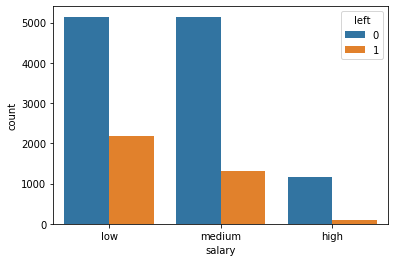

In [25]:
sns.countplot(x=data['salary'],data = data,hue="left")

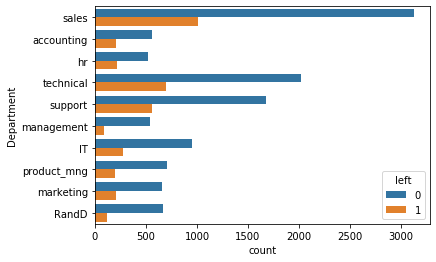

In [28]:
sns.countplot(y=data['Department'],data = data,hue="left")

According to Exploratory data analysis employee retention is directly related to satisfaction_level, last_evaluation,number_project,promotion_last_5years,salary

#### Feature Engineering 

Since salary and Department is categorical data we have convert it into numerical data to apply the classification algorithms 

In [ ]:
data1 =data.copy()

In [32]:
data1['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [63]:
data1['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [66]:
data1['Department'].replace(['sales','technical','support','IT','product_mng','marketing','RandD','accounting','hr','management'],[0,1,2,3,4,5,6,7,8,9],inplace=True)

In [37]:
data1['salary'].replace(['low','medium','high'],[0,1,2],inplace=True)

Assign the value of x with all the features related to employee retention 

In [126]:
x = data1[['satisfaction_level', 'last_evaluation','number_project','promotion_last_5years','salary']] 

In [127]:
x.head()

,satisfaction_level,last_evaluation,number_project,promotion_last_5years,salary
0,0.38,0.53,2,0,0
1,0.80,0.86,5,0,1
2,0.11,0.88,7,0,1
3,0.72,0.87,5,0,0
4,0.37,0.52,2,0,0


Assign the value of y with output features employee left

In [88]:
y=data1['left']

In [44]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Divide the dataset into Train and Test.

In [128]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)

In [92]:
x_train.shape

(11999, 6)

In [93]:
y_train.shape

(11999,)

In [94]:
x_test.shape

(3000, 6)

Create an instances of LogisticRegression and apply the Logistic regression algorithm to find the employee retension.

In [107]:
model = LogisticRegression()

In [129]:
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
model.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [130]:
model.score(x_test,y_test)

0.791